Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [5]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\KNN\glass.csv')

In [6]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


<b>EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
data.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

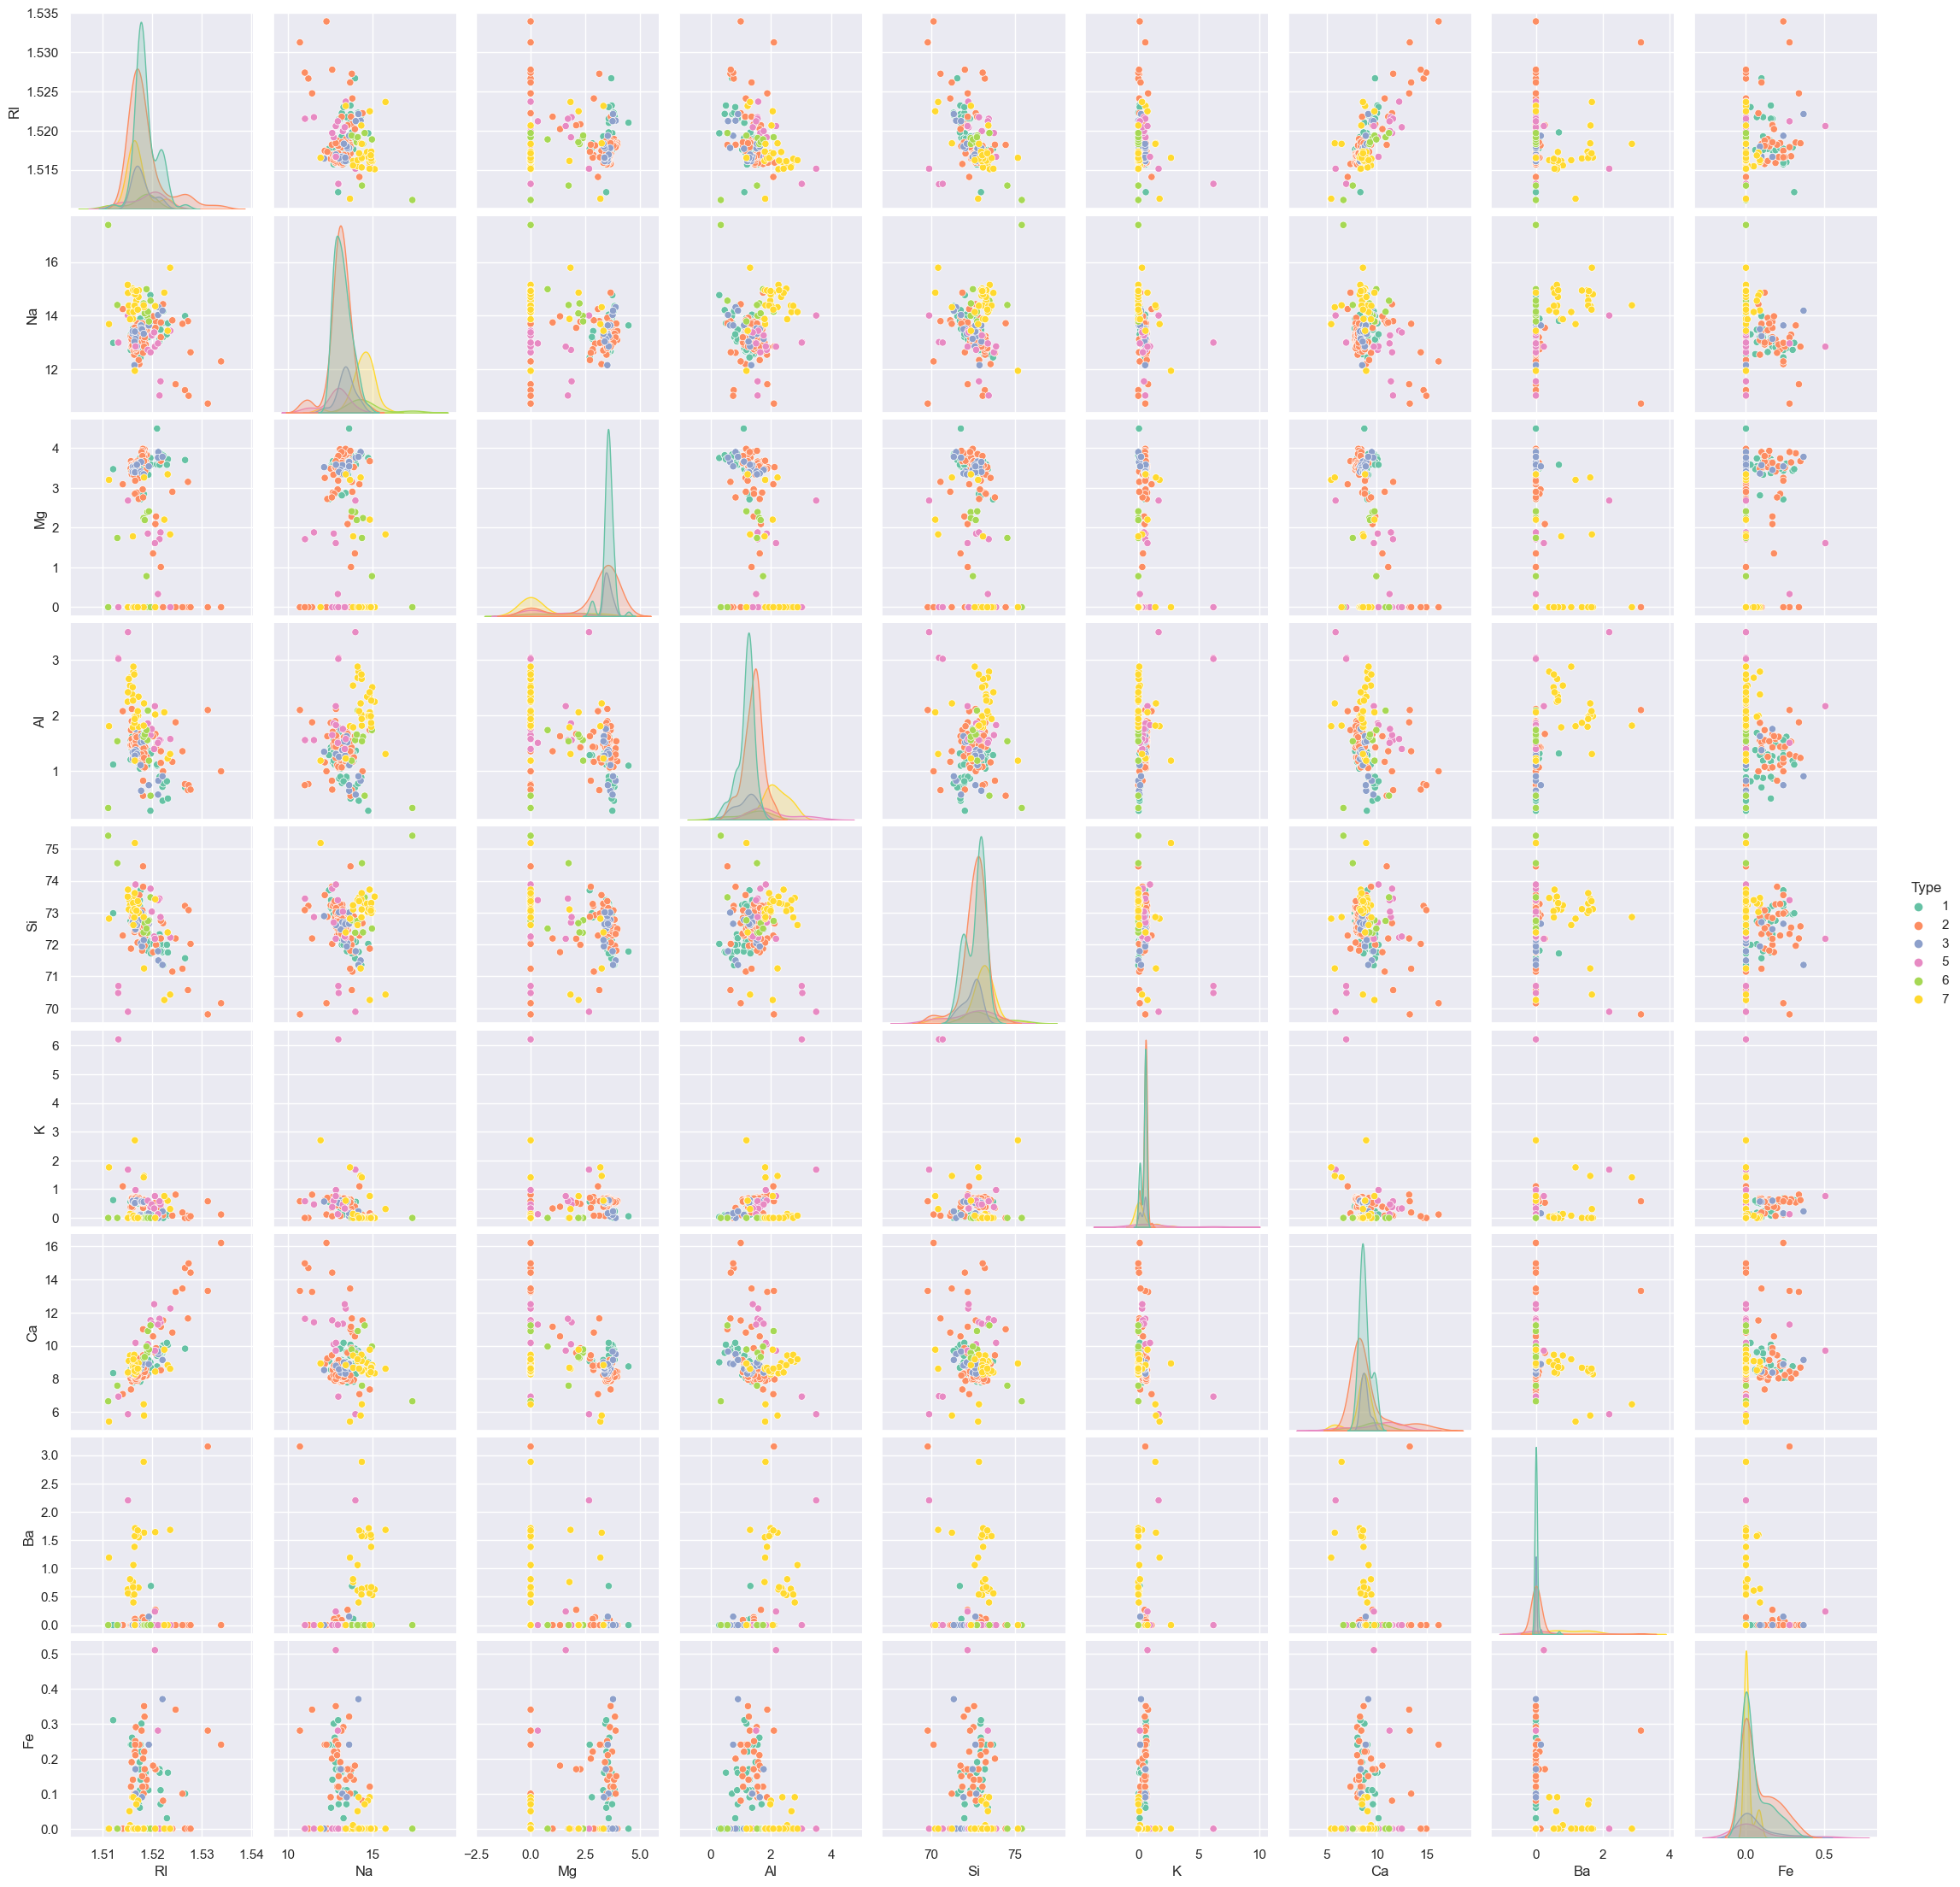

In [12]:
sns.pairplot(data,hue='Type',palette='Set2')

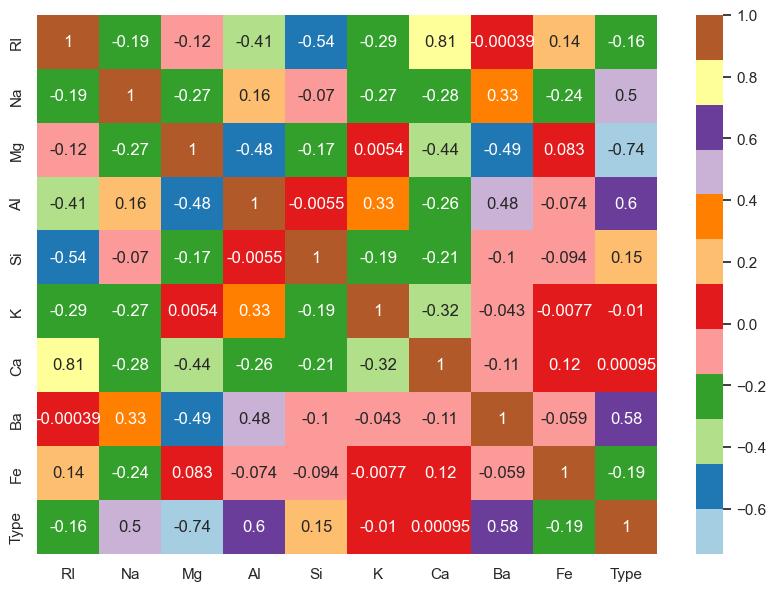

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="Paired")
plt.show()

<b>X and Y

In [14]:
x = data.drop(['Type'],axis=1)
y = data['Type']

Text(0.5, 1.0, 'PiePlot of Type')

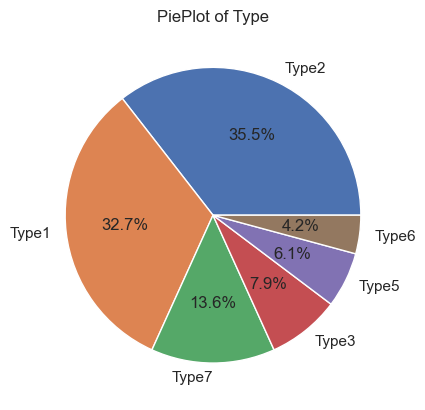

In [15]:
val_count = y.value_counts()
label = val_count.index
values = val_count.values
labels=['Type2', 'Type1', 'Type7', 'Type3', 'Type5', 'Type6']
#Piechart
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('PiePlot of Type')

<b>MODEL BUILDING

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred = model_1.predict(x_test)
y_pred

array([2, 5, 1, 6, 1, 1, 5, 7, 1, 1, 2, 3, 1, 2, 2, 3, 5, 2, 1, 1, 1, 1,
       1, 7, 1, 1, 1, 5, 2, 5, 1, 2, 2, 1, 1, 1, 2, 1, 1, 5, 2, 2, 1],
      dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred))

Confusion_Matrix:  
 [[15  3  0  0  0  0]
 [ 3  7  0  0  0  0]
 [ 3  1  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  1  0]
 [ 0  0  0  1  0  2]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.71      0.83      0.77        18
           2       0.64      0.70      0.67        10
           3       1.00      0.33      0.50         6
           5       0.67      1.00      0.80         4
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.72        43
   macro avg       0.84      0.67      0.70        43
weighted avg       0.76      0.72      0.71        43



<b>Finding Optimim Value of K 

In [24]:
error = []
for k in range(1,51):
    knn_loop = KNeighborsClassifier(n_neighbors=k)
    knn_loop.fit(x_train,y_train)
    y_p = knn_loop.predict(x_test)
    error.append(np.mean(y_p!=y_test))
error

[0.27906976744186046,
 0.3953488372093023,
 0.37209302325581395,
 0.4186046511627907,
 0.4418604651162791,
 0.4418604651162791,
 0.3953488372093023,
 0.4186046511627907,
 0.4186046511627907,
 0.46511627906976744,
 0.4186046511627907,
 0.4186046511627907,
 0.3953488372093023,
 0.3953488372093023,
 0.37209302325581395,
 0.3953488372093023,
 0.37209302325581395,
 0.3953488372093023,
 0.4186046511627907,
 0.4418604651162791,
 0.3953488372093023,
 0.37209302325581395,
 0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907,
 0.4418604651162791,
 0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4418604651162791,
 0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907,
 0.4186

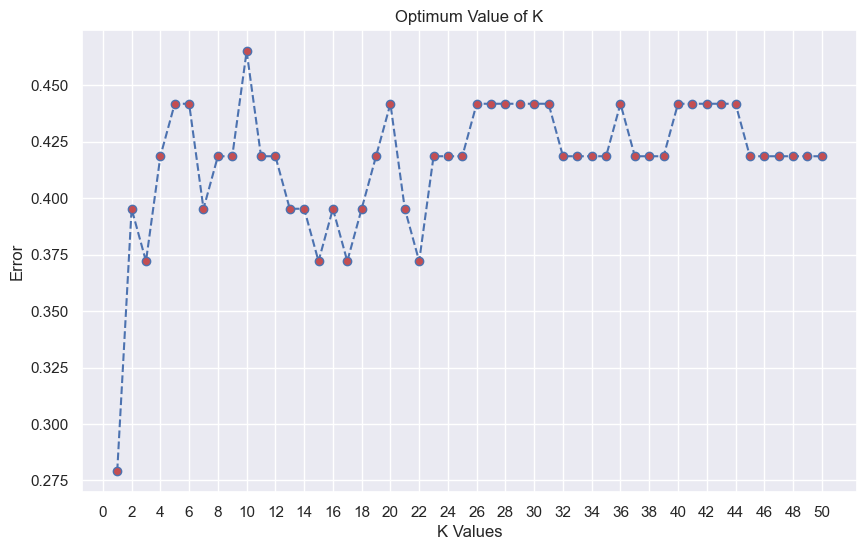

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error,marker='o',markerfacecolor='r',color='b',linestyle='--')
plt.xticks(np.linspace(0,50,26))
plt.xlabel('K Values')
plt.ylabel('Error')
plt.title('Optimum Value of K')
plt.show()

<b>Error rate is constant between 26 to 31 and in between 45 to 50, let us try k = 47

In [34]:
model_2 = KNeighborsClassifier(n_neighbors=47)
model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred_2))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred_2))

Confusion_Matrix:  
 [[17  1  0  0  0  0]
 [ 5  5  0  0  0  0]
 [ 3  3  0  0  0  0]
 [ 2  1  0  0  0  1]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  3]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.63      0.94      0.76        18
           2       0.50      0.50      0.50        10
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.50      1.00      0.67         3

    accuracy                           0.58        43
   macro avg       0.27      0.41      0.32        43
weighted avg       0.41      0.58      0.48        43



D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Accuracy of the model is decreasing, let us Standardize the data 

In [35]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [37]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaled,y,test_size=0.2,random_state=102)

In [42]:
model_3 = KNeighborsClassifier(n_neighbors=47)
model_3.fit(x1_train,y1_train)
y_pred_3 = model_3.predict(x1_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y1_test,y_pred_3))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y1_test,y_pred_3))

Confusion_Matrix:  
 [[12  2  0  0  0]
 [10  9  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 0  2  0  0  4]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.46      0.86      0.60        14
           2       0.69      0.47      0.56        19
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         6

    accuracy                           0.58        43
   macro avg       0.43      0.40      0.39        43
weighted avg       0.60      0.58      0.56        43



D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>No Improvement in results

<b>Hypertuning with GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV
mod_s = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,51)}
grid_search = GridSearchCV(mod_s,param_grid,cv=7,scoring='accuracy',return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, return_train_score=True,
             scoring='accuracy')

In [83]:
grid_search.best_score_

0.7188095238095239

In [84]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [87]:
model_4 = KNeighborsClassifier(n_neighbors=2)
model_4.fit(x_train,y_train)
y_pred_4 = model_4.predict(x_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred_4))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred_4))

Confusion_Matrix:  
 [[16  2  0  0  0  0]
 [ 5  5  0  0  0  0]
 [ 5  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  1  0  2]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.62      0.89      0.73        18
           2       0.45      0.50      0.48        10
           3       0.00      0.00      0.00         6
           5       0.67      0.50      0.57         4
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.60        43
   macro avg       0.62      0.51      0.54        43
weighted avg       0.54      0.60      0.56        43



D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Hypertuning with RandomizedSearchCV

In [88]:
from sklearn.model_selection import RandomizedSearchCV
mod_s2 = KNeighborsClassifier()
param_grid2 = {'n_neighbors':range(1,51)}
random_search = RandomizedSearchCV(mod_s2,param_grid2,cv=7,scoring='accuracy',return_train_score=True)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 51)},
                   return_train_score=True, scoring='accuracy')

In [89]:
random_search.best_score_

0.7007142857142857

In [91]:
random_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [96]:
model_5 = KNeighborsClassifier(n_neighbors=3)
model_5.fit(x_train,y_train)
y_pred_5 = model_5.predict(x_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred_5))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred_5))

Confusion_Matrix:  
 [[15  3  0  0  0  0]
 [ 4  6  0  0  0  0]
 [ 3  2  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  1  0  2]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.68      0.83      0.75        18
           2       0.46      0.60      0.52        10
           3       1.00      0.17      0.29         6
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         3

    accuracy                           0.63        43
   macro avg       0.59      0.50      0.50        43
weighted avg       0.65      0.63      0.59        43



D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>No Improvement in Both Grid Search and Ranomized search

<b>Bagging Classifier

In [100]:
#Let us Build a Bagging Model with KNN as base_estimator
from sklearn.ensemble import BaggingClassifier
bag_mod = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=1),n_estimators=10,random_state=201)
bag_mod.fit(x_train,y_train)
y_pred_bag = bag_mod.predict(x_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred_bag))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred_bag))

Confusion_Matrix:  
 [[15  3  0  0  0  0]
 [ 3  7  0  0  0  0]
 [ 3  1  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  1  0]
 [ 0  0  0  1  0  2]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.71      0.83      0.77        18
           2       0.64      0.70      0.67        10
           3       1.00      0.33      0.50         6
           5       0.67      1.00      0.80         4
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.72        43
   macro avg       0.84      0.67      0.70        43
weighted avg       0.76      0.72      0.71        43



<b>No conclusive improvemt in results

<b>K Fold Cross Validation

In [104]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5,shuffle=True,random_state=301)
kf_mod = KNeighborsClassifier(n_neighbors=1)
result = cross_val_score(kf_mod,x,y,cv=kf)

In [105]:
print(np.mean(result))

0.7481727574750832


<b>Conclusion:<br>
<b>Model with K=1 has the best results in all models